# Distribuciones en Python

1. Cálculo de funciones estadísticas, momentos, percentiles y Valor en Riesgo **(VaR)**.
2. Visualización de datos en Python: histogramas.
3. Tests de Normalidad o Gaussianidad: Jaque-Bera
    * Se utiliza este test por gusto. Ver la kurtosis y el skewness no da una intuición muy buena.
4. Los limites del p-values y los tests estadícticos cuando una distribución noirmal fala el test de normalidad.

In [1]:
%load_ext pycodestyle_magic

In [2]:
%pycodestyle_on

In [4]:
import numpy as np
import scipy
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import skew, kurtosis, chi2

In [5]:
def normality_test(x_size, type_random_variable, degrees_freedom=5):
    """Create a normality test e.g Jarque_bera
    Arg:
        1. x_size : size of distribution.
        2. type_random_variable : generate random distributions.
        3. degrees_freedom : only for t-student
    Return:
    """
    if type_random_variable == "normal":
        x = np.random.standard_normal(size=x_size)
        x_str = type_random_variable
    elif type_random_variable == "exponential":
        x = np.random.standard_exponential(size=x_size)
        x_str = type_random_variable
    elif type_random_variable == "student":
        x = np.random.standard_t(size=x_size, df=degrees_freedom)
        x_str = type_random_variable + "(df=" + str(degrees_freedom) + ")"

    # compute risk metrics
    x_mean = np.mean(x)
    x_stdev = np.std(x)

    # plot histogram
    plt.figure()
    plt.hist(x, bins=100)
    plt.title(type_random_variable)
    plt.show()

    # print risk metrics
    print("mean: " + str(x_mean))
    print("std :" + str(x_stdev))

In [5]:
x_size = 10**6                    # generate random variable
degrees_freedom = 5               # grados de libertad
type_random_variable = "student"  # normal , exponential, student

**NORMAL**

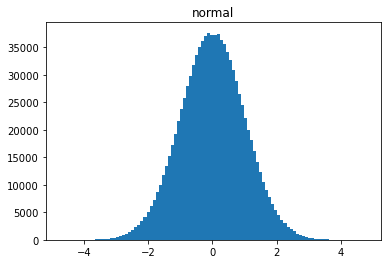

mean: 0.000800061037295098
std :0.9998238768421746


In [6]:
normality_test(10**6, "normal")

**EXPONENTIAL**

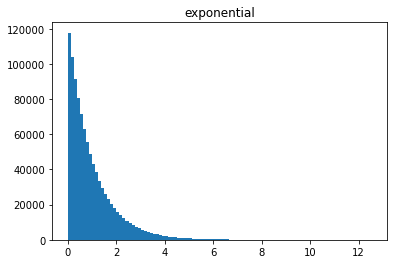

mean: 0.9998463779262183
std :0.9988905161548808


In [7]:
normality_test(10**6, "exponential")

**STUDENT**

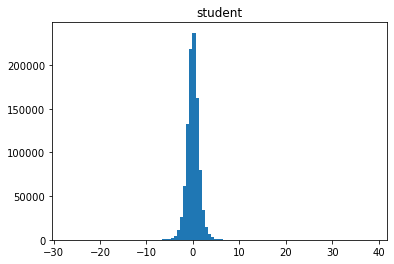

mean: -0.0014495126276510826
std :1.2936438137117252


In [8]:
normality_test(10**6, "student", 5)

Con la `variable aleatoria con distribución t-student` la distribución converje a una distribución normal,  
cuantos más grados de libertad más se acerca a una distribución normal.
* Si te fijas en la distribución degrees_free = 5 , las variables se concentran en la x en un intervalo muy pequeño entre -1,5 y 2
* Con degrees_free = 500 la distribución es más amplia.

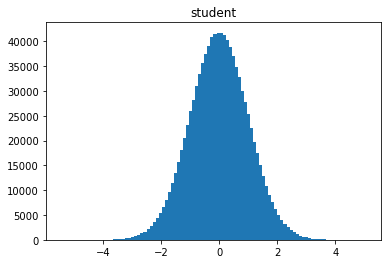

mean: -0.001404004779060744
std :1.0016348212922583


In [9]:
normality_test(10**6, "student", 500)

## TEST DE Jarque-Bera

Es un test de normalidad

Para calcular el test de Jarque-Bera necesitamos la **skewness** y la **kurtosis**, por eso quiero que mi código calcule los primeros cuatro momentos que son:
* mean
* varianza (desviación estandard)
Si la distribución es normal, con estos dos números son suficientes para clasificar la distribución. Es decir, si tenemos dos distribuciones normales que tiene la misma media y la misma varianza significa que es la misma distribución. Esto no para con otras distribución, la **skewness** y la **kurtosis** entonces en el TEST DE Jarque-Bera es de calcular esta estadística:

$$
JB = \frac{n}{6} \left( S^2 - \frac{1}{4}(K - 3)^2 \right)
$$

donde **S** es skewness y **K** es la kurtosis.  

Para calcular la **skewness** se hace dividiendo el momento del orden tres dividido por el momento de orden dos:

$$
S = \frac{ \hat{\mu}_3 }{ \hat{\sigma}^3 } = \frac{ \frac{1}{n} \sum^{n}_{i=1}(x_i - \overline{x})^3}{ 
\left( \frac{1}{n} \sum^{n}_{i=1}(x_i - \overline{x})^2 \right)^\frac{3}{2}}
$$

La Kurtosis se divide el momento de orden 4 dicidido por el momento de orden 2:

$$
K= \frac{ \hat{\mu}_4 }{ \hat{\sigma}^4 } = \frac{ \frac{1}{n} \sum^{n}_{i=1}(x_i - \overline{x})^4}{ 
\left( \frac{1}{n} \sum^{n}_{i=1}(x_i - \overline{x})^2 \right)^2}
$$


>support
>* https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html
>* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html

### SKEWNESS & KURTOSIS

In [10]:
from scipy.stats import skew, kurtosis, chi2

In [11]:
def normality_test(x_size, type_random_variable, degrees_freedom=5):
    """Create a normality test e.g Jarque_bera
    Arg: 
        1. x_size : size of distribution.
        2. type_random_variable : generate random distributions.
        3. degrees_freedom : only for t-student
    Return:
    """
    if type_random_variable == "normal":
        x = np.random.standard_normal(x_size)
        x_str = type_random_variable
    elif type_random_variable == "exponential":
        x = np.random.standard_exponential(x_size)
        x_str = type_random_variable
    elif type_random_variable == "student":
        x = np.random.standard_t(size=x_size, df=degrees_freedom)
        x_str = type_random_variable + "(df=" + str(degrees_freedom) + ")"

    # compute risk metrics
    x_mean = np.mean(x)
    x_stdev = np.std(x)
    x_skew = skew(x)
    x_kurt = kurtosis(x)

    # plot histogram
    plt.figure()
    plt.hist(x, bins=100)
    plt.title(type_random_variable)
    plt.show()

    # print risk metrics
    print("mean: " + str(x_mean))
    print("std :" + str(x_stdev))
    print("skewness : " + str(x_skew))
    print("kurtosis :" + str(x_kurt))

3:9: W291 trailing whitespace


En una variable aleatoria normal standard 
* `mean` es 0,
* `std` es 1, 
* `skew` es 0, 
* `kurtosis` es 3.


Pero aveces la **kurtosis** se llama **kurtosis en exceso** que es kurtosis original -3 .


Cuando vemos la distribución normal podemos ver que tenemos la kurtosis en exceso (kurtosis original = 3, pero la con exceso es -3, osea en este caso tenemos 0 para una variable normal standard):

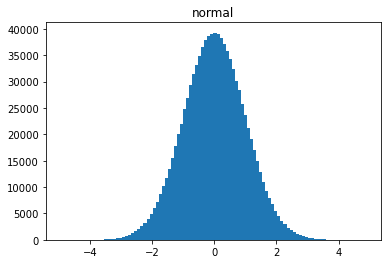

mean: -0.0007743526036957208
std :0.9988925945398556
skewness : -0.0033567391305399635
kurtosis :-0.006023114891490433


In [12]:
normality_test(10**6, "normal")  # exces kurtosis

**EXPONENCIAL**

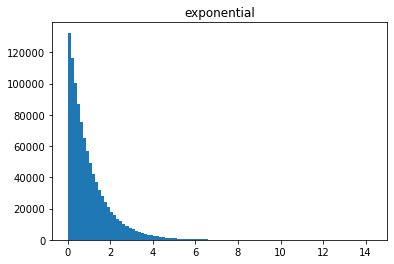

mean: 0.9996670097412833
std :0.9982285741075176
skewness : 1.9874361194657404
kurtosis :5.901647982860819


In [13]:
normality_test(10**6, "exponential")

La media es 1 y la des. standard es 1, es normal porque es una exponencial standard que tiene el exponente landa = 1 por tanto la mean y std es igual a lambda.

**SKEWNESS POSITIVA**

¿Que significa skew: 2?

Sabemos que la **skew** es la integral de orden 3, el valor debajo de la curva de orden 3, pero lo que significa es que si la skewness es + tengo más puntos a la derecha de la media que a la izquierda. En este caso la media es 1 y el área debajo de la curva a la derecha del 1 es más pequeña que el área bajo la curva a la derecha del 1 hasta infinito.

**KURTOSIS Y LAS COLAS**

La kurtosis nos dice qué tan grande es la cola. Relativa a una distrobución normal:
* la kurtosis < 0, la kurtosis es exceso significa que la variable aleatoria con la que estoy jugando decrece más rápido que la normal. 
* la kurtosis > 0, decrece menos rápido que la normal, y se considera colas largas.

**STUDENT**

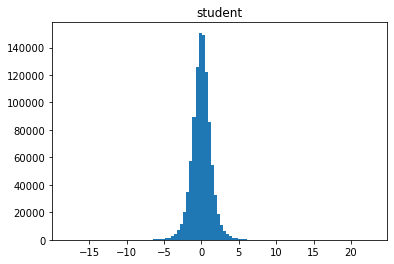

mean: 0.0002876102725112637
std :1.2899833419752318
skewness : 0.008824289635151111
kurtosis :4.546081420643943


In [14]:
normality_test(10**6, "student", 5)

* skew: no es muy grande
* std : es mayor
* kurt : es mayor, significa que tengo colas largas

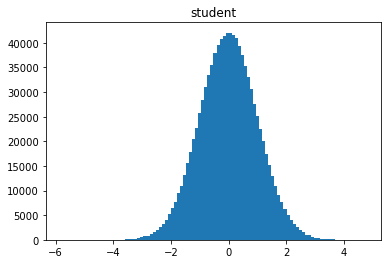

mean: 0.00035997516136844775
std :1.002116420036465
skewness : 0.003729254451914918
kurtosis :0.018555939135692423


In [15]:
normality_test(10**6, "student", 500)

* Ahora con 500 grados de libertad la kurtosis es con exceso.

### Median

In [16]:
x = np.random.standard_normal(size=10**6)

# esperamos que la media de una variable normal sea cero.
x_median = np.percentile(x, 50)

x_median

-0.0003595168839050886

**INTERVALO DE CONFIANZA**  

Si yo quiero calcular los intervalos de confianza con 90% de confianza, en una distribución con variable aleatoria normal, como la media es 0 y la desv sta es 1, los intervalos son $\pm$ 1.64 para cada lado. 5% van a estar a la izquierda de 1.64 y 5 % a la derecha de 1.64. 

Si le pido el percentil 5% me tendría que dar en la parte izquierda de la distribución en el intervalo 1.64

In [17]:
np.percentile(x, 5)

-1.6456470481195957

Si le pido el percentil 95% me tendría que dar en la parte derecha de la distribución en el intervalo 1.64

In [18]:
np.percentile(x, 95)

1.6442925887419657

¿Qué pasa si le pido el intervlo del 95%? Los intervalos son $\pm$ 1.96 , osea el 2.5% de mis datos estarán a a izquierda y 2.5% estarán a la derecha

In [19]:
np.percentile(x, 2.5)

-1.9589360668804967

In [20]:
np.percentile(x, 97.5)

1.9607701845112873

**VALOR EN RIESGO (VaR)**

En un histograma con distribución normal, el valor en VaR es: "dame un número en el que sólamente el 5% de los casos están a la izquierda o de forma equivalente el 95% de los casos estén a la derecha" y esto es equivalente a calcularlo con el precentil 5.

In [21]:
x_var_95 = np.percentile(x, 5)
x_var_95

-1.6456470481195957

In [22]:
def normality_test(x_size, type_random_variable, degrees_freedom=5):
    """Create a normality test e.g Jarque_bera
    Arg:
        1. x_size : size of distribution.
        2. type_random_variable : generate random distributions.
        3. degrees_freedom : only for t-student
    Return:
    """
    if type_random_variable == "normal":
        x = np.random.standard_normal(x_size)
        x_str = type_random_variable
    elif type_random_variable == "exponential":
        x = np.random.standard_exponential(x_size)
        x_str = type_random_variable
    elif type_random_variable == "student":
        x = np.random.standard_t(size=x_size, df=degrees_freedom)
        x_str = type_random_variable + "(df=" + str(degrees_freedom) + ")"

    # compute risk metrics
    x_mean = np.mean(x)
    x_stdev = np.std(x)
    x_skew = skew(x)
    x_kurt = kurtosis(x)
    x_var_95 = np.percentile(x, 5)

    # plot histogram
    plt.figure()
    plt.hist(x, bins=100)
    plt.title(type_random_variable)
    plt.show()

    # print risk metrics
    print("mean: " + str(x_mean))
    print("std :" + str(x_stdev))
    print("skewness : " + str(x_skew))
    print("kurtosis :" + str(x_kurt))
    print("VaR 95% :" + str(x_var_95))

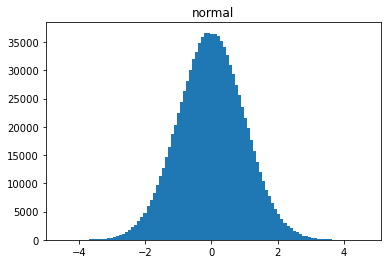

mean: -0.001699979986472386
std :0.998919734512415
skewness : 0.0035672017389473073
kurtosis :0.0005359859675246881
VaR 95% :-1.6427084808610868


In [23]:
normality_test(10**6, "normal")

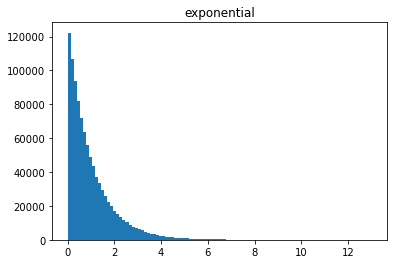

mean: 1.0022731863738215
std :1.0016002568085338
skewness : 2.0000477959453353
kurtosis :6.026325300590422
VaR 95% :0.051610143667251654


In [24]:
normality_test(10**6, "exponential")

En una distribución exponencial, podemos ver en el `VaR 95% :0.05146408138999089` que sólamente el 5% de los valores son mayores que 0.0514

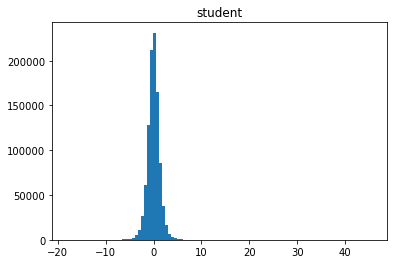

mean: -0.0010735977206786278
std :1.2892954884280048
skewness : 0.051807170461202055
kurtosis :5.899943023036869
VaR 95% :-2.0162125913632214


In [25]:
normality_test(10**6, "student")

Podemos ver cómo el valor en riesgo está más hacia la izquierda que en la distribución normal que era -1.64, ésto utilizando 5 grados de libertad.

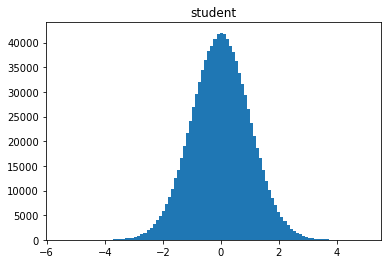

mean: -0.0008177736601323647
std :1.0089780089085394
skewness : -0.0029522169267313897
kurtosis :0.052762203676821606
VaR 95% :-1.6600446106095263


In [26]:
normality_test(10**6, "student", 100)

Con 100 grados de libertad ya se hacerca más a la normal.

**TEST DE Jarque-Bera**

En estadística , la prueba de Jarque-Bera es una prueba de bondad de ajuste de si los datos de muestra tienen la asimetría y la curtosis que coinciden con una distribución normal. El estadístico de prueba siempre es no negativo. Si está lejos de cero, indica que los datos no tienen una distribución normal.

https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test

> "In statistics, the Jarque–Bera test is a [goodness-of-fit](https://www.investopedia.com/terms/g/goodness-of-fit.asp) test of whether sample data have the skewness and kurtosis matching a normal distribution. The test statistic is always nonnegative. If it is far from zero, it signals the data do not have a normal distribution."
>
> "Samples from a normal distribution have an expected skewness of 0 and an expected excess kurtosis of 0 (which is the same as a kurtosis of 3). As the definition of JB shows, any deviation from this increases the JB statistic."


$$
JB = \frac{n}{6} \left( S^2 - \frac{1}{4}(K - 3)^2 \right)
$$

donde **S** es skewness y **K** es la kurtosis.  

`x_jb = x_size/6 * (x_skew**2 + 1/4*(x_kurt**2))`

In [27]:
def normality_test(x_size, type_random_variable, degrees_freedom=5):
    """Create a normality test e.g Jarque_bera
    Arg:
        1. x_size : size of distribution.
        2. type_random_variable : generate random distributions.
        3. degrees_freedom : only for t-student
    Return:
    """
    if type_random_variable == "normal":
        x = np.random.standard_normal(x_size)
        x_str = type_random_variable
    elif type_random_variable == "exponential":
        x = np.random.standard_exponential(x_size)
        x_str = type_random_variable
    elif type_random_variable == "student":
        x = np.random.standard_t(size=x_size, df=degrees_freedom)
        x_str = type_random_variable + "(df=" + str(degrees_freedom) + ")"

    # compute risk metrics
    x_mean = np.mean(x)
    x_stdev = np.std(x)
    x_skew = skew(x)
    x_kurt = kurtosis(x)
    x_var_95 = np.percentile(x, 5)
    x_jb = x_size/6 * (x_skew**2 + 1/4*(x_kurt**2))

    # plot histogram
    plt.figure()
    plt.hist(x, bins=100)
    plt.title(type_random_variable)
    plt.show()

    # print risk metrics
    print("mean: " + str(x_mean))
    print("std : " + str(x_stdev))
    print("skewness : " + str(x_skew))
    print("kurtosis : " + str(x_kurt))
    print("VaR 95% : " + str(x_var_95))
    print("Jarque-Bera : " + str(x_jb))

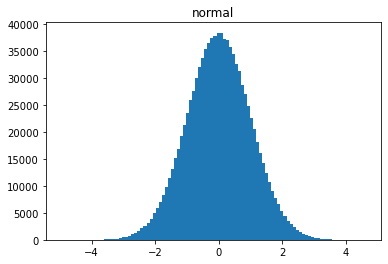

mean: 0.00016976553289518046
std : 0.99987313694643
skewness : -0.0009310681742185724
kurtosis : 0.0014837038170814054
VaR 95% : -1.6449878124573145
Jarque-Bera : 0.23620536654136481


In [28]:
normality_test(10**6, "normal")

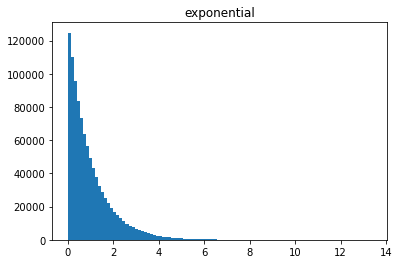

mean: 0.9991812371801759
std : 0.9982362318288572
skewness : 1.9937085323322963
kurtosis : 5.902878477387951
VaR 95% : 0.05159412782146743
Jarque-Bera : 2114311.2152661784


In [29]:
normality_test(10**6, "exponential")

**JB CON DISTRUCIÓN NORMAL Y EL CHI-SQUARD**

https://numpy.org/doc/stable/reference/random/generated/numpy.random.chisquare.html> 

> "Si los datos provienen de una distribución normal, el estadístico JB tiene asintóticamente una [distribución chi-cuadrado](https://en.wikipedia.org/wiki/Chi-squared_distribution) con dos grados de libertad , por lo que el estadístico se puede usar para probar la hipótesis de que los datos provienen de una distribución normal ."

Vamos a comprobar si puedo confiar en una distrobución `chi-squard`

https://en.wikipedia.org/wiki/Chi-squared_distribution#/media/File:Chi-square_pdf.svg

<img src="img/01.png">

In [37]:
def normality_test(x_size, type_random_variable, degrees_freedom=5):
    """Create a normality test e.g Jarque_bera
    Arg:
        1. x_size : size of distribution.
        2. type_random_variable : generate random distributions.
        3. degrees_freedom : only for t-student
    Return:
    """
    if type_random_variable == "normal":
        x = np.random.standard_normal(x_size)
        x_str = type_random_variable
    elif type_random_variable == "exponential":
        x = np.random.standard_exponential(x_size)
        x_str = type_random_variable
    elif type_random_variable == "student":
        x = np.random.standard_t(size=x_size, df=degrees_freedom)
        x_str = type_random_variable + "(df=" + str(degrees_freedom) + ")"
    elif type_random_variable == "chi-squared":
        x = np.random.chisquare(size=x_size, df=degrees_freedom)
        x_str = type_random_variable + "(df=" + str(degrees_freedom) + ")"

    # compute risk metrics
    x_mean = np.mean(x)
    x_stdev = np.std(x)
    x_skew = skew(x)
    x_kurt = kurtosis(x)
    x_var_95 = np.percentile(x, 5)
    x_jb = x_size/6 * (x_skew**2 + 1/4*(x_kurt**2))

    # plot histogram
    plt.figure()
    plt.hist(x, bins=100)
    plt.title(type_random_variable)
    plt.show()

    # print risk metrics
    print("mean: " + str(x_mean))
    print("std : " + str(x_stdev))
    print("skewness : " + str(x_skew))
    print("kurtosis : " + str(x_kurt))
    print("VaR 95% : " + str(x_var_95))
    print("Jarque-Bera : " + str(x_jb))

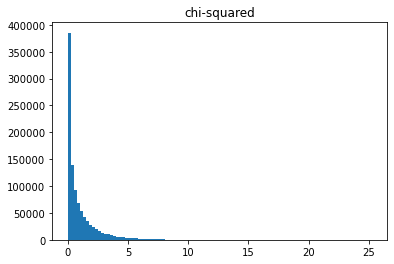

mean: 0.9987037941120012
std : 1.4151835702495013
skewness : 2.8480359813347866
kurtosis : 12.284029728529898
VaR 95% : 0.003941638981192743
Jarque-Bera : 7639275.92397153


In [39]:
normality_test(10**6, "chi-squared", 1)

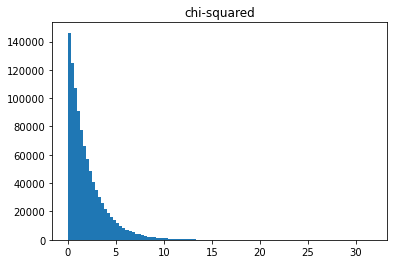

mean: 2.0013233180449106
std : 2.0016547506782367
skewness : 2.0020963296607466
kurtosis : 6.033125147836289
VaR 95% : 0.10255029206361933
Jarque-Bera : 2184673.2459341157


In [40]:
normality_test(10**6, "chi-squared", 2)

> Como nos marca el dibiujop, parece que la asintota vuela al infinito.

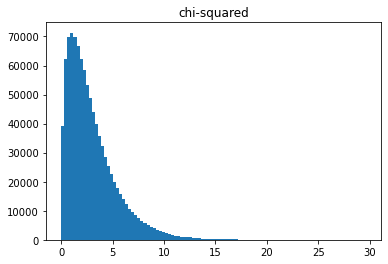

mean: 3.001882946920359
std : 2.449980910051582
skewness : 1.6340748396812004
kurtosis : 3.98535696024142
VaR 95% : 0.35232684078395154
Jarque-Bera : 1106828.017802554


In [41]:
normality_test(10**6, "chi-squared", 3)

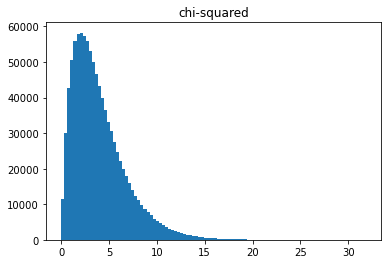

mean: 4.00009425765395
std : 2.8280726762248185
skewness : 1.4112592610694792
kurtosis : 2.9641059003587795
VaR 95% : 0.7116443542876868
Jarque-Bera : 698022.2748483008


In [42]:
normality_test(10**6, "chi-squared", 4)

> El que nos interesa según definición es el de 2º de libertad

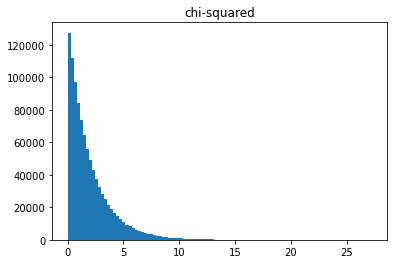

mean: 2.000475269898026
std : 2.000857472433822
skewness : 1.9983768924099217
kurtosis : 5.9989219317602025
VaR 95% : 0.10312956050027919
Jarque-Bera : 2165046.048326054


In [43]:
normality_test(10**6, "chi-squared", 2)

¿Buscamos que el JB se vaya a cero? Si, cualquier desviación de cero nos va a alejar de la normalidad, porque el test de JB dice que si mi distribución es normal entonces el test de JB se comporta asintoticamente  como una variable chi-squart de grado 2, y entonces quiero que la variable sea lo más pequeña posible.

**P-VALUE**


¿Qué es el p-value?

dada la probabilidad de que mi distribución es normal, (o mejor para este caso, dada que mi distribución es chi-square) cuando calculo del JB me dice cuál es la probabilidad de que dicha variable aleatoria (que es mi chi-square) sea mayor que el valor que encontré $Pr(T > t)$

Como yo lo que quiero es la cola a la derecha, voy a restarle del 1 toda la función acumulativa.

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html

`p_value = 1 - chi2.cdf(jb, df = degrees_freedom)`


In [47]:
def normality_test(x_size, type_random_variable, degrees_freedom=5):
    """Create a normality test e.g Jarque_bera
    Arg:
        1. x_size : size of distribution.
        2. type_random_variable : generate random distributions.
        3. degrees_freedom : only for t-student
    Return:
    """
    if type_random_variable == "normal":
        x = np.random.standard_normal(x_size)
        x_str = type_random_variable
    elif type_random_variable == "exponential":
        x = np.random.standard_exponential(x_size)
        x_str = type_random_variable
    elif type_random_variable == "student":
        x = np.random.standard_t(size=x_size, df=degrees_freedom)
        x_str = type_random_variable + "(df=" + str(degrees_freedom) + ")"
    elif type_random_variable == "chi-squared":
        x = np.random.chisquare(size=x_size, df=degrees_freedom)
        x_str = type_random_variable + "(df=" + str(degrees_freedom) + ")"

    # compute risk metrics
    x_mean = np.mean(x)
    x_stdev = np.std(x)
    x_skew = skew(x)
    x_kurt = kurtosis(x)
    x_var_95 = np.percentile(x, 5)
    jb = x_size/6 * (x_skew**2 + 1/4*(x_kurt**2))
    p_value = 1 - chi2.cdf(jb, df=degrees_freedom)

    # plot histogram
    plt.figure()
    plt.hist(x, bins=100)
    plt.title(type_random_variable)
    plt.show()

    # print risk metrics
    print("mean: " + str(x_mean))
    print("std : " + str(x_stdev))
    print("skewness : " + str(x_skew))
    print("kurtosis : " + str(x_kurt))
    print("VaR 95% : " + str(x_var_95))
    print("Jarque-Bera : " + str(jb))
    print("p_value : " + str(p_value))

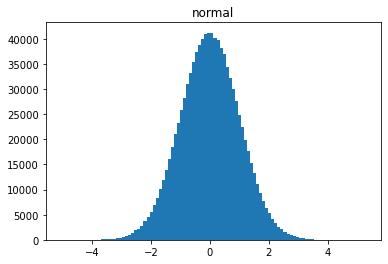

mean: 0.0006323778428630176
std : 1.0009745725605377
skewness : -0.0015074450647469832
kurtosis : -0.010019033393342092
VaR 95% : -1.6459735418991162
Jarque-Bera : 4.561274692909337
p_value : 0.47172718904354205


In [52]:
normality_test(10**6, "normal")

> Tengo el p-value **¿Que necesito para rechazar la hipótesis?**  
> para rechazar la hipotesis necesito que el p-value (la Pr de que haya valores a la derecha, necesito que esa probabilidad se mayor que 5% si estamos ajustando al 5%). Rechazamos cuando el p-value sea un valor menor al nivel de significancia, con 95% de confianza si yo voy a rechazar o no la normalidad.

* `is normal = (p_value > 0.05)`

La **hipótesis** es que :  
>" si tu distribución es normal en tonces la estadística de Jarque-Bera que el número resultado de la fórmula, se comporta asintoticamente como un chi-square con 2º de libertad"
>
> A ese valor que concontré de Jarque-Bera, le voy a calcular el p-value, si ese p-value es menor que 0.05 la distribución no es normal y rechazo la hipotesis nula.

In [18]:
def normality_test(x_size, type_random_variable, degrees_freedom=5):
    """Create a normality test by example with Jarque_Bera
    Arg:
        1. x_size : size of distribution.
        2. type_random_variable : generate random distributions.
        3. degrees_freedom : only for t-student
    Return:
        Plot and risk metrics
    """
    if type_random_variable == "normal":
        x = np.random.standard_normal(x_size)
        x_str = type_random_variable
    elif type_random_variable == "exponential":
        x = np.random.standard_exponential(x_size)
        x_str = type_random_variable
    elif type_random_variable == "student":
        x = np.random.standard_t(size=x_size, df=degrees_freedom)
        x_str = type_random_variable + "(df=" + str(degrees_freedom) + ")"
    elif type_random_variable == "chi-squared":
        x = np.random.chisquare(size=x_size, df=degrees_freedom)
        x_str = type_random_variable + "(df=" + str(degrees_freedom) + ")"

    # compute risk metrics
    x_mean = np.mean(x)
    x_stdev = np.std(x)
    x_skew = skew(x)
    x_kurt = kurtosis(x)
    x_var_95 = np.percentile(x, 5)
    jb = x_size/6 * (x_skew**2 + 1/4*(x_kurt**2))
    p_value = 1 - chi2.cdf(jb, df=2) # buscamos dos grados de libertad
    is_normal = (p_value > 0.05) # equivalenty jb < 6

    # plot histogram
    plt.figure()
    plt.hist(x, bins=100)
    plt.title(type_random_variable)
    plt.show()

    # print risk metrics
    print("mean: " + str(x_mean))
    print("std : " + str(x_stdev))
    print("skewness : " + str(x_skew))
    print("kurtosis : " + str(x_kurt))
    print("VaR 95% : " + str(x_var_95))
    print("Jarque-Bera : " + str(jb))
    print("p_value : " + str(p_value))
    print("is normal :" + str(is_normal))



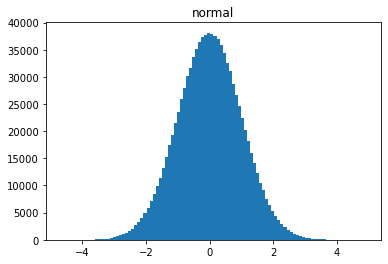

mean: -0.001478513440666017
std : 0.9993424897057173
skewness : 0.003731113854855631
kurtosis : 0.0031469998475763816
VaR 95% : -1.6463965568756869
Jarque-Bera : 2.7328521013428477
p_value : 0.25501674975391553
is normal :True


In [19]:
normality_test(10**6, "normal")

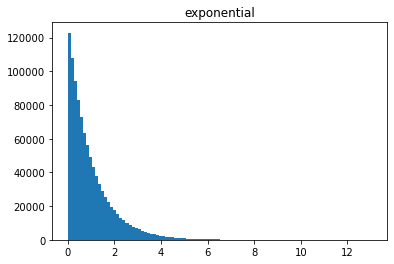

mean: 0.9994370975220935
std : 1.0011368485437464
skewness : 2.007224272195556
kurtosis : 6.038218215421699
VaR 95% : 0.05110023913032089
Jarque-Bera : 2190661.51385893
p_value : 0.0
is normal :False


In [20]:
normality_test(10**6, "exponential")

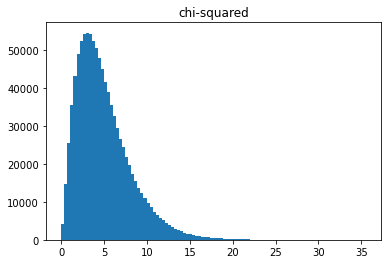

mean: 5.000100214546895
std : 3.1620873580824274
skewness : 1.2651315988046572
kurtosis : 2.3959049175886564
VaR 95% : 1.1481587940496443
Jarque-Bera : 505941.34263756743
p_value : 0.0
is normal :False


In [21]:
normality_test(10**6, "chi-squared")

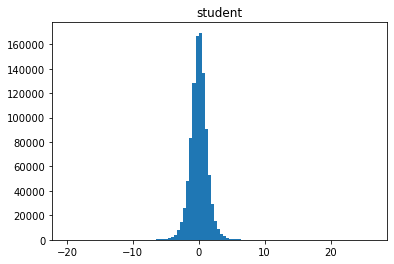

mean: 0.000933690543395272
std : 1.289127861386448
skewness : 0.02100050809228325
kurtosis : 4.591170353811928
VaR 95% : -2.012654394293774
Jarque-Bera : 878358.7209617535
p_value : 0.0
is normal :False


In [22]:
normality_test(10**6, "student")

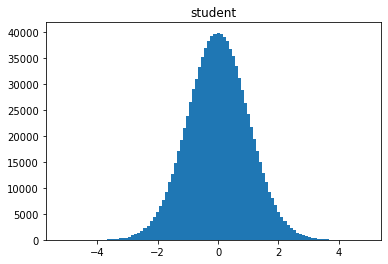

mean: 0.0008599227645488523
std : 1.0110391050634633
skewness : 0.0032478068162915515
kurtosis : 0.04730636189994453
VaR 95% : -1.65896997361748
Jarque-Bera : 95.00353636134676
p_value : 0.0
is normal :False


In [23]:
normality_test(10**6, "student", 100)

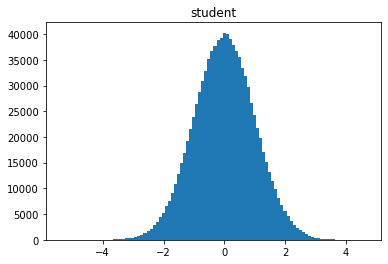

mean: 0.00043768399136780324
std : 1.0017942063832832
skewness : -0.006467976916534489
kurtosis : 0.006005076269869569
VaR 95% : -1.6447021288323833
Jarque-Bera : 8.474993440760109
p_value : 0.014443703253767426
is normal :False


In [24]:
normality_test(10**6, "student", 500)

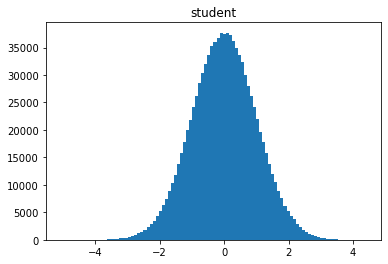

mean: -0.0009738790312407896
std : 1.0003486027105235
skewness : -0.0015319621587212735
kurtosis : -8.75099488295561e-06
VaR 95% : -1.6456297700631206
Jarque-Bera : 0.3911545334553008
p_value : 0.8223598000586129
is normal :True


In [25]:
normality_test(10**6, "student", 5000)

> Acabamos de mostrar que estadísticamente el test es cierto, cuando incrementas losgrados de libertad en una distribución student entonces converge en distribución normal.

**SUPONGAMOS QUE VOY A CORRER MUCHOS TEST DE NORMALIDAD**

Estoy calculando con un nivel de confianza al 95%, significa que aún a ese nivel y aún cuando todas mis distribuciones sena normales si corro esto infinidad de veces va haber alguna distribucion nomrla que en algún test de jarque-bera lo verá como no normal, en otras palabras tendré algún falso negativo ¿porqué eso es cierto? por un teorema que se llama

**Teorema de BOREL-CANTELLI** si tengo una secuencia de eventos, si la suma de las probabilidades es finita, entonces la probabilidad de que infinitamente alguno de ellos ocurra es 0.

> esto es, si yo estoy haciendo los test a un nivel del 95%, si hago esto dos veces los estoy haciendo al $(95\%)^2$, si lo hago $n$ veces, lo estoy haciendo al $(95\%)^n$ entonces si sumamos la serie de las n probabilidades al nivel de 95% la suma infinita es negativa:
>
> $$\sum^{\infty}_{n=1} Pr(E_n) < \infty$$
>
> va haber casos en los cuales alguna fallará.

¿Cómo creamos esto?

In [ ]:
is_normal = True
counter = 0
while is_normal:
    ...

In [28]:
def normality_test(x_size, type_random_variable, degrees_freedom=5):
    """Create a normality test e.g Jarque_bera
    Arg:
        1. x_size : size of distribution.
        2. type_random_variable : generate random distributions.
        3. degrees_freedom : only for t-student
    Return:
    """

    is_normal = True
    counter = 0
    while is_normal:
        
        if type_random_variable == "normal":
            x = np.random.standard_normal(x_size)
            x_str = type_random_variable
        elif type_random_variable == "exponential":
            x = np.random.standard_exponential(x_size)
            x_str = type_random_variable
        elif type_random_variable == "student":
            x = np.random.standard_t(size=x_size, df=degrees_freedom)
            x_str = type_random_variable + "(df=" + str(degrees_freedom) + ")"
        elif type_random_variable == "chi-squared":
            x = np.random.chisquare(size=x_size, df=degrees_freedom)
            x_str = type_random_variable + "(df=" + str(degrees_freedom) + ")"

        # compute risk metrics
        x_mean = np.mean(x)
        x_stdev = np.std(x)
        x_skew = skew(x)
        x_kurt = kurtosis(x)
        x_var_95 = np.percentile(x, 5)
        jb = x_size/6 * (x_skew**2 + 1/4*(x_kurt**2))
        p_value = 1 - chi2.cdf(jb, df=2) # buscamos dos grados de libertad
        is_normal = (p_value > 0.05) # equivalenty jb < 6

        # plot histogram
        plt.figure()
        plt.hist(x, bins=100)
        plt.title(type_random_variable)
        plt.show()
        
        print("counter :" + str(counter))
        print("------------")

        # print risk metrics
        print("mean: " + str(x_mean))
        print("std : " + str(x_stdev))
        print("skewness : " + str(x_skew))
        print("kurtosis : " + str(x_kurt))
        print("VaR 95% : " + str(x_var_95))
        print("Jarque-Bera : " + str(jb))
        print("p_value : " + str(p_value))
        print("is normal :" + str(is_normal))
        
        counter += 1

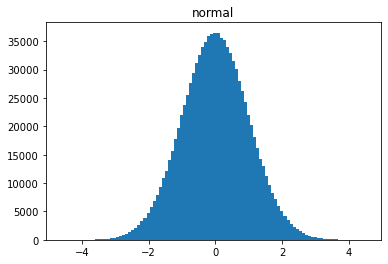

counter :0
------------
mean: 0.00047450856810721546
std : 1.001304965082843
skewness : 0.002758991422940946
kurtosis : -0.0003037601948805424
VaR 95% : -1.6457902524751444
Jarque-Bera : 1.2725168726433618
p_value : 0.5292690176942971
is normal :True


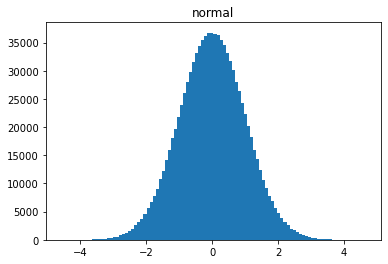

counter :1
------------
mean: -0.00010104328558787223
std : 0.9993425064555196
skewness : -0.00031420876699921226
kurtosis : -0.0007997268677262248
VaR 95% : -1.6433849996878713
Jarque-Bera : 0.04310298583332749
p_value : 0.9786790811312662
is normal :True


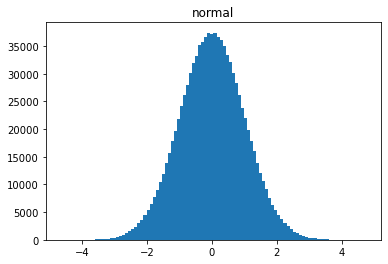

counter :2
------------
mean: 0.0009280030582200121
std : 1.0008889204867757
skewness : 0.002232068533676407
kurtosis : -0.0028520142766934597
VaR 95% : -1.6472579058288983
Jarque-Bera : 1.1692710496073626
p_value : 0.5573089500885997
is normal :True


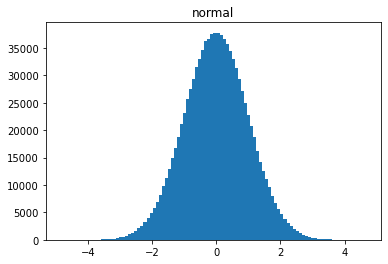

counter :3
------------
mean: 0.0012442730554321595
std : 1.0000175454293112
skewness : 0.0008872134144306597
kurtosis : 0.0044212537274797015
VaR 95% : -1.6444865561544237
Jarque-Bera : 0.945669795572333
p_value : 0.6232329598252535
is normal :True


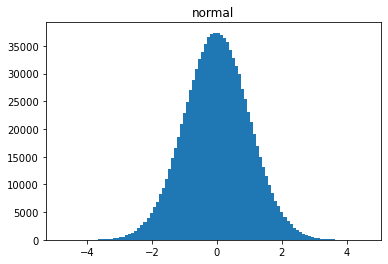

counter :4
------------
mean: -0.00037137766337116404
std : 1.0009012470793244
skewness : -0.0034452052076297153
kurtosis : 0.007078974781115299
VaR 95% : -1.6468050268392358
Jarque-Bera : 4.066234985099251
p_value : 0.13092672118631532
is normal :True


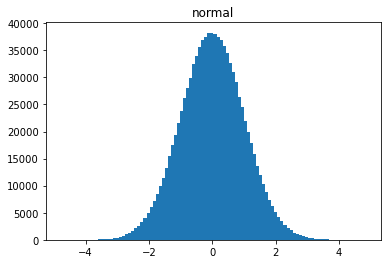

counter :5
------------
mean: 6.443676598220992e-05
std : 1.0000128846078011
skewness : -0.000497371698447897
kurtosis : 0.006677404519431551
VaR 95% : -1.6462915128386157
Jarque-Bera : 1.8990518975746953
p_value : 0.3869244019676211
is normal :True


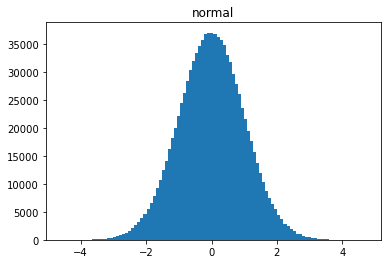

counter :6
------------
mean: 0.0006032539023805602
std : 0.9996631063739393
skewness : 0.0009390760808554064
kurtosis : 0.00836103260049681
VaR 95% : -1.6435955539510771
Jarque-Bera : 3.0597634037128936
p_value : 0.2165612845986722
is normal :True


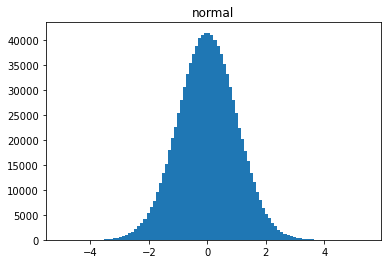

counter :7
------------
mean: 9.214179728627533e-05
std : 0.9993149991336215
skewness : -0.0005433772400561366
kurtosis : 0.004256956016424507
VaR 95% : -1.6436248223139809
Jarque-Bera : 0.8042795760757043
p_value : 0.6688872367204158
is normal :True


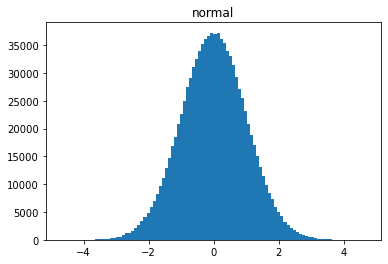

counter :8
------------
mean: 0.00010688924560362946
std : 1.0011272376735487
skewness : -0.0005891971485962463
kurtosis : -0.0056921299420960025
VaR 95% : -1.646824164348366
Jarque-Bera : 1.4078731832234013
p_value : 0.4946342929360218
is normal :True


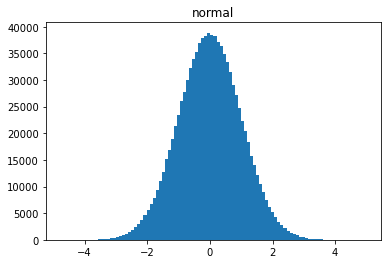

counter :9
------------
mean: -0.0008971077251587724
std : 1.0001787905656743
skewness : 0.0026844107757406565
kurtosis : -0.007375643893902772
VaR 95% : -1.6429138382724062
Jarque-Bera : 3.4676819875548106
p_value : 0.17660476774071554
is normal :True


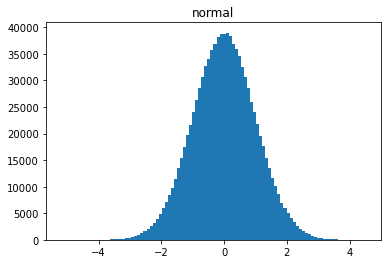

counter :10
------------
mean: 0.0020147766422922036
std : 1.0004848016879204
skewness : 0.0007791149505195501
kurtosis : 0.0016109448549421757
VaR 95% : -1.6436609794424175
Jarque-Bera : 0.20930098958987467
p_value : 0.9006392456886325
is normal :True


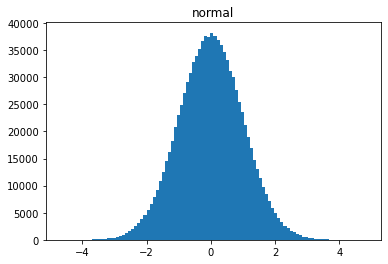

counter :11
------------
mean: 3.1474726735683476e-05
std : 1.000110824959963
skewness : 0.004512758463780425
kurtosis : 0.014007561577973338
VaR 95% : -1.6424271643015294
Jarque-Bera : 11.56965571543343
p_value : 0.0030738394680739356
is normal :False


In [29]:
normality_test(10**6, "normal")

> La número 11 no ha superado del test de Jarque-Bera, skewness y la jurtosis son pequeñitas pero son un poco más grandes que las demás.
>
>Esto nos dice que, aún cuando la distribución es normal, la distribución puede no satisfacer el test de de normalidad; y esto nos lo dice también el Teorema de BOREL-CANTELLI.